In [1]:
from importlib import reload 
import sys
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.spatial.distance import braycurtis
from scipy.special import softmax
import seaborn as sns
# # adding Folder_2 to the system path
# sys.path.insert(0, r'C:\Users\tomer\Desktop\BSc\year3\sem B\workshop_microbiome\code')
# # sys.path.insert(0, r'C:\Users\yuvald\Documents\Uni\סמסטר ב\workshop_microbiome\code')

from imports import  *

import model_class
reload(model_class)


<module 'model_class' from 'c:\\Users\\tomer\\Desktop\\BSc\\year3\\sem B\\workshop_microbiome\\Milestone2\\model_class.py'>

$$f(D,\Delta_t) = \alpha e^{-\lambda \Delta_t} \cdot \cos\left(\frac{2 \pi \Delta_t}{365}\right) D_{t-1} + \beta\left(1- e^{-\lambda \Delta_t} \cdot \cos\left(\frac{2 \pi \Delta_t}{365}\right)\right)\cdot \overline{\{D_1,...,D_{t-2}\}}$$

In [2]:
import model_class
reload(model_class)


<module 'model_class' from 'c:\\Users\\tomer\\Desktop\\BSc\\year3\\sem B\\workshop_microbiome\\Milestone2\\model_class.py'>

In [3]:
data_path = r"train_data.csv"
metadata_path = r"train_metadata.csv"

In [4]:
metadata_df = pd.read_csv(metadata_path)

In [5]:
metadata_df.columns

Index(['sample', 'baboon_id', 'collection_date', 'sex', 'age', 'social_group',
       'group_size', 'rain_month_mm', 'season', 'hydro_year', 'month',
       'diet_PC1', 'diet_PC2', 'diet_PC3', 'diet_PC4', 'diet_PC5', 'diet_PC6',
       'diet_PC7', 'diet_PC8', 'diet_PC9', 'diet_PC10', 'diet_PC11',
       'diet_PC12', 'diet_PC13'],
      dtype='object')

In [6]:
metadata_df.social_group.unique()

array(['g_1.22', 'g_2.2', 'g_1.1', 'g_1.12', 'g_1.21', 'g_1.211',
       'g_1.11', 'g_2.1', 'g_2.12', 'g_2.11'], dtype=object)

In [7]:
# data_df = pd.read_csv(r"C:\Users\yuvald\Documents\Uni\סמסטר ב\workshop_microbiome\train_data.csv", index_col="sample")
# metadata_df = pd.read_csv(r"C:\Users\yuvald\Documents\Uni\סמסטר ב\workshop_microbiome\train_metadata.csv",  index_col="sample")

In [8]:
super_model = model_class.superModel(data_path, metadata_path)

c:\Users\tomer\Desktop\BSc\year3\sem B\workshop_microbiome\Milestone2\model_class.py:236: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_clean["collection_date"] = (pd.to_datetime(metadata_clean['collection_date']) - pd.Timestamp('1970-01-01')).dt.days


In [9]:
train_baboons = super_model.baboons[:60]
test_baboon = super_model.baboons[60:]
super_model.baboons = train_baboons

In [10]:
super_model.lambda_

0

In [11]:
import time
super_model.lambda_ = 0.14531145 
print(super_model.lambda_)
start = time.time()
super_model.fit()
time.time() - start

0.14531145
for lambda = 0.14531145 the objective function is 22.04265256608777
for lambda = 0.14531146 the objective function is 22.042652557193552
for lambda = 1.0 the objective function is 22.091814156786118
for lambda = 0.99999999 the objective function is 22.091814152076534
for lambda = 0.46784350193198326 the objective function is 22.08665198642588
for lambda = 0.46784351193198326 the objective function is 22.08665198474495
for lambda = 0.22138166526983805 the objective function is 22.074245460136925
for lambda = 0.22138167526983804 the objective function is 22.074245456710155
for lambda = 0.15701057088986783 the objective function is 22.04847586648601
for lambda = 0.15701058088986783 the objective function is 22.048475866293806
for lambda = 0.14714028013231742 the objective function is 22.044757261472245
for lambda = 0.14714029013231741 the objective function is 22.04475725400744
for lambda = 0.1454593145565297 the objective function is 22.046189560537282
for lambda = 0.145459324

15472.928065299988

In [12]:
true_data = [baboon.data.iloc[2:] for baboon in test_baboon]
known_data = [baboon.data.iloc[:2] for baboon in test_baboon]
known_metadata = [baboon.metadata for baboon in test_baboon]

bc_scores = []
samples = 0
for i in range(len(test_baboon)):
    pred = super_model.predict(known_data[i], known_metadata[i], iterative = True)
    bc = 0
    samples += len(pred)
    for j in range(len(pred)):
        bc += braycurtis(pred.iloc[j].values, true_data[i].iloc[j].values)
    print(bc / len(pred))
    bc_scores.append(bc / len(pred))
print(np.sum(bc_scores) / samples)

0.5160686193676464
0.5298098116217614
0.43904853625256823
0.6720140667586841
0.43956336332258233
0.4027420195363462
0.39049441538387314
0.5752673006408537
0.5481892174560057
0.510832934649866
0.32039735461969654
0.5189078357345936
0.516049721813025
0.34369193329528297
0.35966571065508085
0.400007108303331
0.41860483197008647
0.4613626924368422
0.4499353630087716
0.33024126902424394
0.006211205234953221


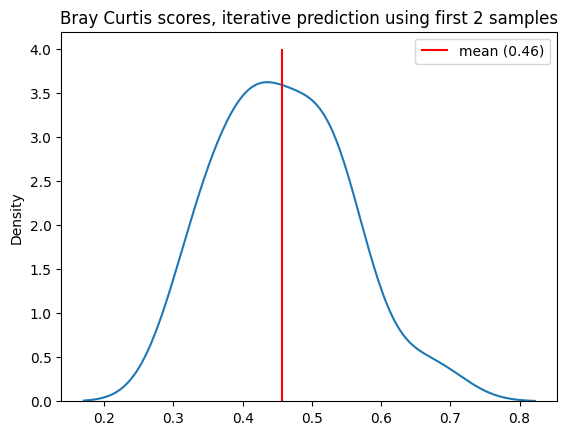

In [13]:
sns.kdeplot(bc_scores)
plt.vlines(np.mean(bc_scores), 0, 4, label =f"mean ({np.mean(bc_scores):.2f})", colors="red")
plt.title("Bray Curtis scores, iterative prediction using first 2 samples")
plt.legend()

In [14]:

bc_scores1 = []
samples = 0
for i in range(len(test_baboon)):
    pred = super_model.predict(known_data[i], known_metadata[i], iterative = False)
    bc = 0
    samples += len(pred)
    for j in range(len(pred)):
        bc += braycurtis(pred.iloc[j].values, true_data[i].iloc[j].values)
    print(bc / len(pred))
    bc_scores1.append(bc / len(pred))
print(np.sum(bc_scores1) / samples)

0.6276564956856979
0.5274571911533211
0.43486302551591816
0.7066583833553204
0.4451358309184361
0.4463830334407636
0.4258019468586771
0.5969663429794454
0.6143328045689042
0.5448817678650034
0.3263086300622218
0.6377427217299406
0.6047536813357237
0.3506474759836518
0.4198992239425271
0.3755991869476904
0.4368881967175711
0.481965325207953
0.4747199476297564
0.3303888958723216
0.00666375686669215


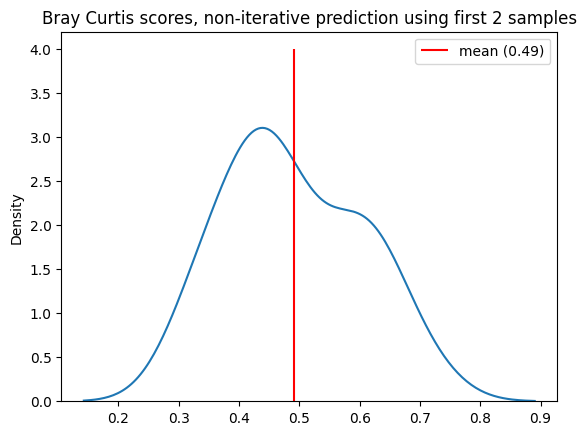

In [15]:
sns.kdeplot(bc_scores1)
plt.vlines(np.mean(bc_scores1), 0, 4, label =f"mean ({np.mean(bc_scores1):.2f})", colors="red")
plt.title("Bray Curtis scores, non-iterative prediction using first 2 samples")
plt.legend()

In [16]:
true_data = [baboon.data.iloc[:-10] for baboon in test_baboon]
known_data = [baboon.data.iloc[-10:] for baboon in test_baboon]
known_metadata = [baboon.metadata for baboon in test_baboon]

bc_scores2 = []
samples = 0
for i in range(len(test_baboon)):
    pred = super_model.predict(known_data[i], known_metadata[i], iterative = False)
    bc = 0
    samples += len(pred)
    for j in range(len(pred)):
        bc += braycurtis(pred.iloc[j].values, true_data[i].iloc[j].values)
    print(bc / len(pred))
    bc_scores2.append(bc / len(pred))
print(np.sum(bc_scores2) / samples)

0.43370065564817495
0.37137639327070865
0.43410507332129084
0.3690423100453007
0.4816630145477317
0.3407485001469556
0.38648212344283817
0.44592623982201707
0.41447723433875877
0.39006487089459563
0.3465169741605308
0.3931188010174247
0.38867926526814717
0.3133561053209631
0.3310574744246458
0.41022294261243
0.5978161289038563
0.3982370186888251
0.40693578095487903
0.33316411424509224
0.006087416936795096


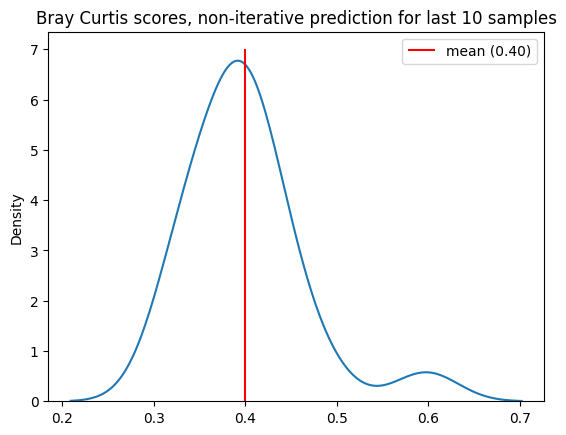

In [17]:
sns.kdeplot(bc_scores2)
plt.vlines(np.mean(bc_scores2), 0, 7, label =f"mean ({np.mean(bc_scores2):.2f})", colors="red")
plt.title("Bray Curtis scores, Non iterative prediction for last 10 samples")
plt.legend()

In [ ]:
bc_scores3 = []
samples = 0
for i in range(len(test_baboon)):
    pred = super_model.predict(known_data[i], known_metadata[i], iterative = True)
    bc = 0
    samples += len(pred)
    for j in range(len(pred)):
        bc += braycurtis(pred.iloc[j].values, true_data[i].iloc[j].values)
    print(bc / len(pred))
    bc_scores3.append(bc / len(pred))
print(np.sum(bc_scores3) / samples)

0.4387500171740952
0.3633863821149463
0.40958898911986136


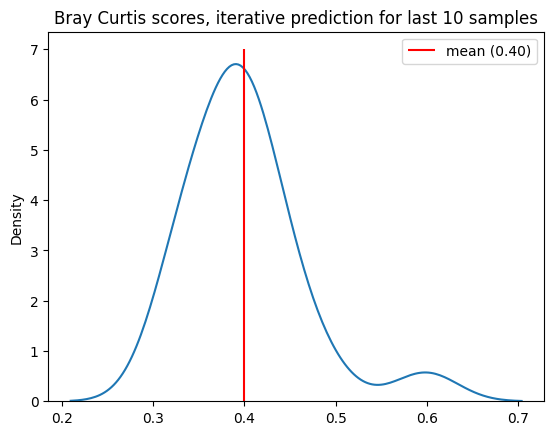

In [19]:
sns.kdeplot(bc_scores3)
plt.vlines(np.mean(bc_scores3), 0, 7, label =f"mean ({np.mean(bc_scores3):.2f})", colors="red")
plt.title("Bray Curtis scores, iterative prediction for last 10 samples")
plt.legend()

In [25]:
a = 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])